In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import calendar

In [2]:
register_matplotlib_converters()

In [37]:
# Import data 
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

In [38]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [42]:
df = df[(df.value >= df.value.quantile(0.025)) & (df.value <= df.value.quantile(0.975))]
len(df)

1238

Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

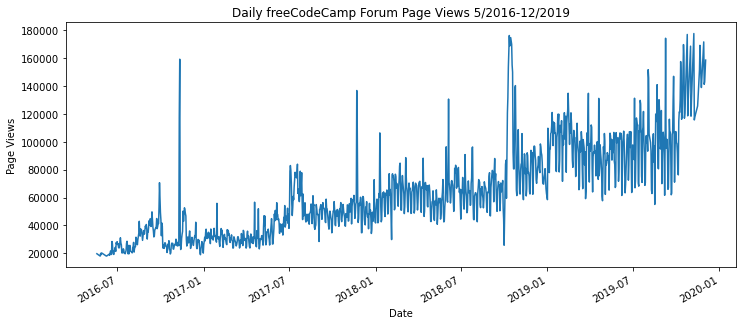

In [44]:
# Draw line plot
fig, ax = plt.subplots(figsize=(12,5))
df.plot(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views', legend=False, ax=ax)
# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')

In [140]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['month'] = df_bar.index.month

df_bar['year'] = df_bar.index.year
df_bar = df_bar.groupby(by=['year','month'])['value'].mean().unstack()
df_bar.columns = [calendar.month_name[col] for col in df_bar.columns]
df_bar

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


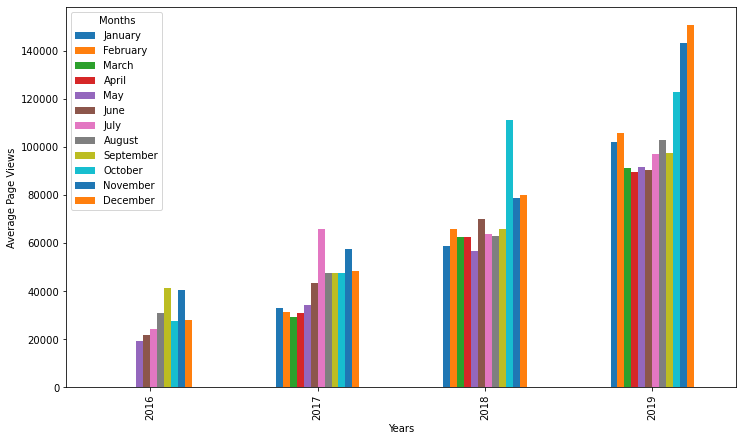

In [141]:
# Draw bar plot
fig, ax = plt.subplots(figsize=(12,7))

df_bar.plot(kind='bar', xlabel='Years', ylabel='Average Page Views', ax=ax)
ax.legend(title='Months')
# Save image and return fig 
fig.savefig('bar_plot.png')

<AxesSubplot:xlabel='month'>

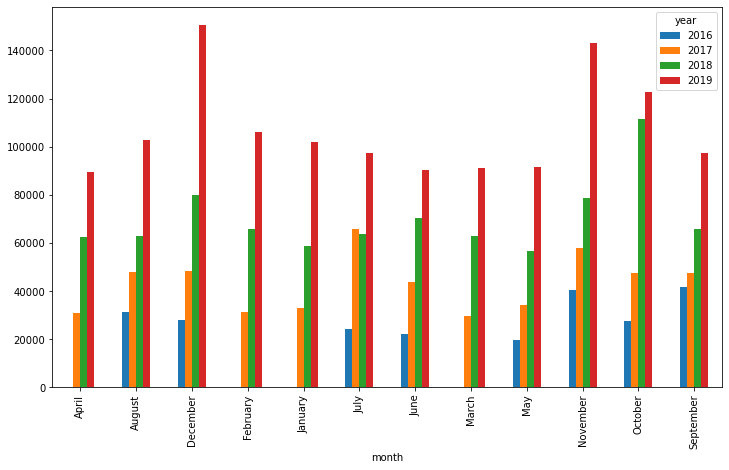

In [150]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['month'] = df_bar.index.month_name()

df_bar['year'] = df_bar.index.year
df_bar = df_bar.groupby(by=['month', 'year'])['value'].mean().unstack()

# Draw bar plot
fig, ax = plt.subplots(figsize=(12,7))

df_bar.plot(kind='bar', ax=ax)

In [151]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


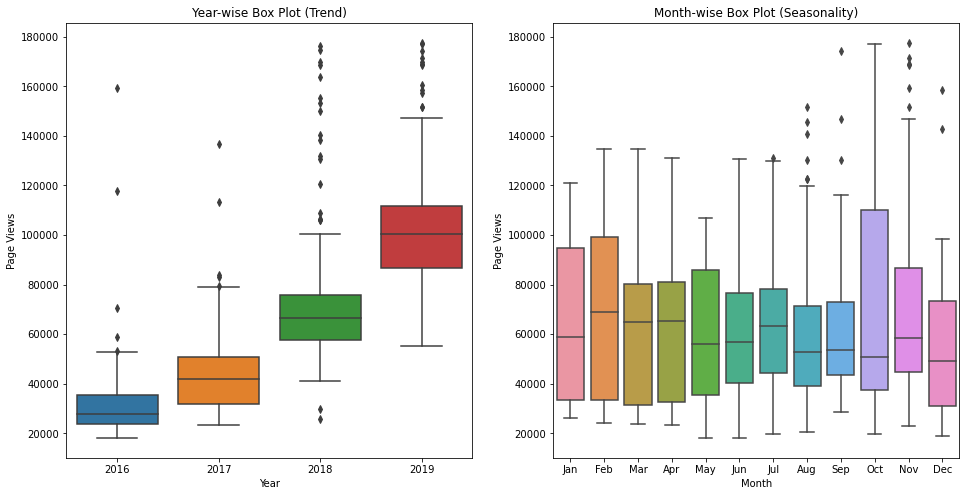

In [171]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
ax = axs[0]
sns.boxplot(x="year", y="value", data=df_box, ax=ax)
ax.set_ylabel('Page Views')
ax.set_xlabel('Year')
ax.set_title('Year-wise Box Plot (Trend)')

ax = axs[1]
sns.boxplot(x="month", y="value", data=df_box, 
            order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
            ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Page Views')
ax.set_title('Month-wise Box Plot (Seasonality)')
# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')